## Predicting Survival on the Titanic using Logistic Regression

### Data Prep

In [288]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [289]:
#reading the data from the disk into memory
df = pd.read_csv("train.csv")

In [290]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [291]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25

In [292]:
#create a new dataframe and put only the variables I'm going to be using into it.
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['survived'] = df['Survived']
X['Pclass'] = df['Pclass']
X['Emb'] = df['Embarked']
X['SibSp'] = df['SibSp']

In [293]:
X.describe

<bound method NDFrame.describe of         sex   age  survived  Pclass Emb  SibSp
0      male  22.0         0       3   S      1
1    female  38.0         1       1   C      1
2    female  26.0         1       3   S      0
3    female  35.0         1       1   S      1
4      male  35.0         0       3   S      0
5      male   NaN         0       3   Q      0
6      male  54.0         0       1   S      0
7      male   2.0         0       3   S      3
8    female  27.0         1       3   S      0
9    female  14.0         1       2   C      1
10   female   4.0         1       3   S      1
11   female  58.0         1       1   S      0
12     male  20.0         0       3   S      0
13     male  39.0         0       3   S      1
14   female  14.0         0       3   S      0
15   female  55.0         1       2   S      0
16     male   2.0         0       3   Q      4
17     male   NaN         1       2   S      0
18   female  31.0         0       3   S      1
19   female   NaN         

In [294]:
#drop missing values
X = X.dropna(axis=0)

In [295]:
X.shape

(712, 6)

In [296]:
#survived will be my dependent variable, y. Assign it to y and remove it from X
y = X['survived']
X = X.drop(['survived'], axis=1)

In [297]:
X.describe

<bound method NDFrame.describe of         sex   age  Pclass Emb  SibSp
0      male  22.0       3   S      1
1    female  38.0       1   C      1
2    female  26.0       3   S      0
3    female  35.0       1   S      1
4      male  35.0       3   S      0
6      male  54.0       1   S      0
7      male   2.0       3   S      3
8    female  27.0       3   S      0
9    female  14.0       2   C      1
10   female   4.0       3   S      1
11   female  58.0       1   S      0
12     male  20.0       3   S      0
13     male  39.0       3   S      1
14   female  14.0       3   S      0
15   female  55.0       2   S      0
16     male   2.0       3   Q      4
18   female  31.0       3   S      1
20     male  35.0       2   S      0
21     male  34.0       2   S      0
22   female  15.0       3   Q      0
23     male  28.0       1   S      0
24   female   8.0       3   S      3
25   female  38.0       3   S      1
27     male  19.0       1   S      3
30     male  40.0       1   C      0
33  

In [298]:
# We need to handle Sex such that it's categorical, for logistic regression.
#Use pandas get_dummies to implement one hot encoding for "Sex"
pd.get_dummies(X.sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [299]:
#Here, since I only have two variables it's easy, I'll just take one, and reassign it to sex
#so now Sex becomes female = 1, male = 0
X['sex'] = pd.get_dummies(X.sex)['female']

In [300]:
X.describe

<bound method NDFrame.describe of      sex   age  Pclass Emb  SibSp
0      0  22.0       3   S      1
1      1  38.0       1   C      1
2      1  26.0       3   S      0
3      1  35.0       1   S      1
4      0  35.0       3   S      0
6      0  54.0       1   S      0
7      0   2.0       3   S      3
8      1  27.0       3   S      0
9      1  14.0       2   C      1
10     1   4.0       3   S      1
11     1  58.0       1   S      0
12     0  20.0       3   S      0
13     0  39.0       3   S      1
14     1  14.0       3   S      0
15     1  55.0       2   S      0
16     0   2.0       3   Q      4
18     1  31.0       3   S      1
20     0  35.0       2   S      0
21     0  34.0       2   S      0
22     1  15.0       3   Q      0
23     0  28.0       1   S      0
24     1   8.0       3   S      3
25     1  38.0       3   S      1
27     0  19.0       1   S      3
30     0  40.0       1   C      0
33     0  66.0       2   S      0
34     0  28.0       1   C      1
35     0  42.0

In [301]:
X['EmbS']=pd.get_dummies(X.Emb)['S'] 
X['EmbC']=pd.get_dummies(X.Emb)['C']

In [302]:
X.describe

<bound method NDFrame.describe of      sex   age  Pclass Emb  SibSp  EmbS  EmbC
0      0  22.0       3   S      1     1     0
1      1  38.0       1   C      1     0     1
2      1  26.0       3   S      0     1     0
3      1  35.0       1   S      1     1     0
4      0  35.0       3   S      0     1     0
6      0  54.0       1   S      0     1     0
7      0   2.0       3   S      3     1     0
8      1  27.0       3   S      0     1     0
9      1  14.0       2   C      1     0     1
10     1   4.0       3   S      1     1     0
11     1  58.0       1   S      0     1     0
12     0  20.0       3   S      0     1     0
13     0  39.0       3   S      1     1     0
14     1  14.0       3   S      0     1     0
15     1  55.0       2   S      0     1     0
16     0   2.0       3   Q      4     0     0
18     1  31.0       3   S      1     1     0
20     0  35.0       2   S      0     1     0
21     0  34.0       2   S      0     1     0
22     1  15.0       3   Q      0     0     0


In [303]:
X = X.drop(['Emb'], axis=1)

In [304]:
X.describe

<bound method NDFrame.describe of      sex   age  Pclass  SibSp  EmbS  EmbC
0      0  22.0       3      1     1     0
1      1  38.0       1      1     0     1
2      1  26.0       3      0     1     0
3      1  35.0       1      1     1     0
4      0  35.0       3      0     1     0
6      0  54.0       1      0     1     0
7      0   2.0       3      3     1     0
8      1  27.0       3      0     1     0
9      1  14.0       2      1     0     1
10     1   4.0       3      1     1     0
11     1  58.0       1      0     1     0
12     0  20.0       3      0     1     0
13     0  39.0       3      1     1     0
14     1  14.0       3      0     1     0
15     1  55.0       2      0     1     0
16     0   2.0       3      4     0     0
18     1  31.0       3      1     1     0
20     0  35.0       2      0     1     0
21     0  34.0       2      0     1     0
22     1  15.0       3      0     0     0
23     0  28.0       1      0     1     0
24     1   8.0       3      3     1     0


In [305]:
#remember to scale our features, as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [306]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation
At this point I have a test and train set defined.  I will use train to train my model and test to see how accurate the model is.

In [307]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [308]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Measuring Model Performance

In [309]:
from sklearn.metrics import accuracy_score
print("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.81


In [310]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [311]:
print("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, model.predict(X_test) ))



---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.78      0.91      0.84        80
          1       0.86      0.68      0.76        63

avg / total       0.82      0.81      0.81       143



In [312]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

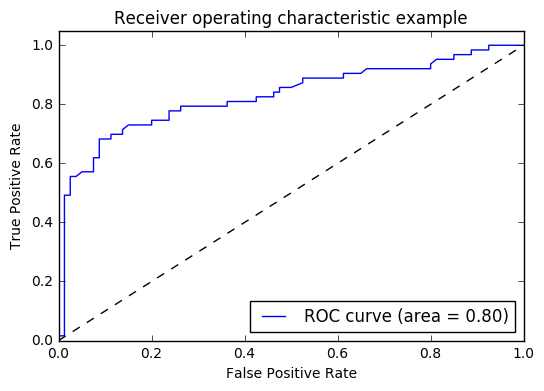

In [313]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()